In [1]:
# Import needed packages and define rootpath
import os
import sys
import pandas as pd
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

root_path = os.path.abspath(os.path.join('../..')) # <- adjust such that root_path always points at the root project dir (i.e. if current file is two folders deep, use '../..'). 
if root_path not in sys.path:
    sys.path.append(root_path)


In [2]:
# Get sweep_results for desired features/hyperparamter/metrics from desired coarse tuning 
pkl_files = glob.glob(os.path.join(root_path, "models", "trad_ml", "sweep_results","rf_feature_h2h_alpha_feature_cols", "*.pkl"))

accuracy_h2h = []
for file in pkl_files:
    with open(file, 'rb') as f:
        obj = pkl.load(f)
        file_name = os.path.basename(file)  # Get only the file name from the path
        file_name_without_ext = os.path.splitext(file_name)[0]  # Remove the file extension
        shortened_file_name = file_name_without_ext[:-16]  # Remove the last 6 characters
        accuracy_h2h.append({
            'H2H Features': obj['fg_config']['h2h_feature_cols'],
            'H2H Alpha':obj['fg_config']['h2h_alpha'],
            'Accuracy': obj['metrics']['accuracy'],
            'Log Loss': obj['metrics']['lnloss'],
        })

df = pd.DataFrame(accuracy_h2h)

print(df)




               H2H Features  H2H Alpha  Accuracy  Log Loss
0              result_score       0.30  0.516218  1.014355
1   [result_score, xg, xga]       0.60  0.517317  1.012045
2   [result_score, xg, xga]       0.70  0.510720  1.015648
3              result_score       0.50  0.512919  1.016087
4              result_score       0.50  0.517317  1.011996
5   [result_score, xg, xga]       0.70  0.512369  1.013064
6   [result_score, xg, xga]       0.05  0.511270  1.015075
7   [result_score, xg, xga]       0.80  0.522265  1.011721
8   [result_score, xg, xga]       0.80  0.516218  1.013560
9   [result_score, xg, xga]       0.05  0.519516  1.012926
10  [result_score, xg, xga]       0.10  0.515668  1.013068
11  [result_score, xg, xga]       0.90  0.515118  1.016385
12  [result_score, xg, xga]       0.90  0.521165  1.010725
13  [result_score, xg, xga]       0.10  0.518966  1.012723
14  [result_score, xg, xga]       0.15  0.508521  1.016613
15  [result_score, xg, xga]       0.15  0.514019  1.0146

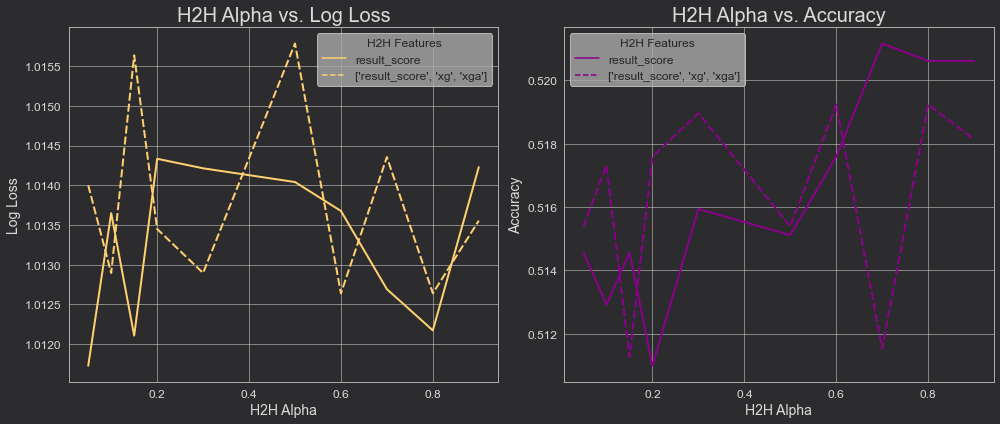

In [51]:
# Plot

# Define the colors for both plots
log_loss_color = (255/255, 208/255, 112/255)   # Gold
accuracy_color = (139/255, 0/255, 139/255)  # Purple
label_color = (218/255, 218/255, 218/255)     # Light grey
grid_color = (218/255, 218/255, 218/255)      # Light grey
background_color = (44/255, 44/255, 46/255)   # Dark grey
legend_color = (169/255, 169/255, 169/255)    # Grey

# Convert 'H2H Features' column to string representation for the plot
df['H2H Features'] = df['H2H Features'].apply(str)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Set the background color of the plot (entire figure)
fig.set_facecolor(background_color)

# Left plot for 'Log Loss'
sns.set_style("whitegrid")
sns.lineplot(x='H2H Alpha', y='Log Loss', hue='H2H Features', style='H2H Features',
             data=df, markers=None, dashes=True, ci=None,
             linewidth=2, ax=axes[0])

# Set line colors for the left plot
lines_left = axes[0].get_lines()
for line in lines_left:
    if line.get_label() == "['result_score', 'xg', 'xga']":
        line.set_color(log_loss_color),
        line.set_linestyle('dashed') 
    else:
        line.set_color(log_loss_color)

# Right plot for 'Accuracy'
sns.lineplot(x='H2H Alpha', y='Accuracy', hue='H2H Features', style='H2H Features',
             data=df, markers=None, dashes=True, ci=None,
             linewidth=2, ax=axes[1])

# Set line colors for the right plot
lines_right = axes[1].get_lines()
for line in lines_right:
    if line.get_label() == "['result_score', 'xg', 'xga']":
        line.set_color(accuracy_color),
        line.set_linestyle('dashed')
    else:
        line.set_color(accuracy_color)
        
# Set titles and labels for both subplots
axes[0].set_title('H2H Alpha vs. Log Loss', color=label_color, fontsize= 20)
axes[0].set_xlabel('H2H Alpha', color=label_color, fontsize=14)
axes[0].set_ylabel('Log Loss', color=label_color, fontsize = 14)
axes[0].grid(True, linestyle='-', linewidth=0.5, color=grid_color)
axes[0].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[0].tick_params(axis='y', colors=label_color, labelsize = 12)


axes[1].set_title('H2H Alpha vs. Accuracy', color=label_color, fontsize= 20)
axes[1].set_xlabel('H2H Alpha', color=label_color, fontsize = 14)
axes[1].set_ylabel('Accuracy', color=label_color, fontsize = 14)
axes[1].grid(True, linestyle='-', linewidth=0.5, color=grid_color)
axes[1].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[1].tick_params(axis='y', colors=label_color, labelsize = 12)



# Set legend titles
axes[0].legend(title='H2H Features', title_fontsize=12, facecolor=legend_color, fontsize = 12)
axes[1].legend(title='H2H Features', title_fontsize=12, facecolor=legend_color, fontsize = 12)

# Set background color of each subplot
for ax in axes:
    ax.set_facecolor(background_color)

# Set background color of the entire figure
fig.set_facecolor(background_color)

# Save the plot
plt.savefig("optimization_h2h_plot.png", dpi=300, bbox_inches="tight")

plt.show()

